# Investigate a Dataset: FBI Gun Data

 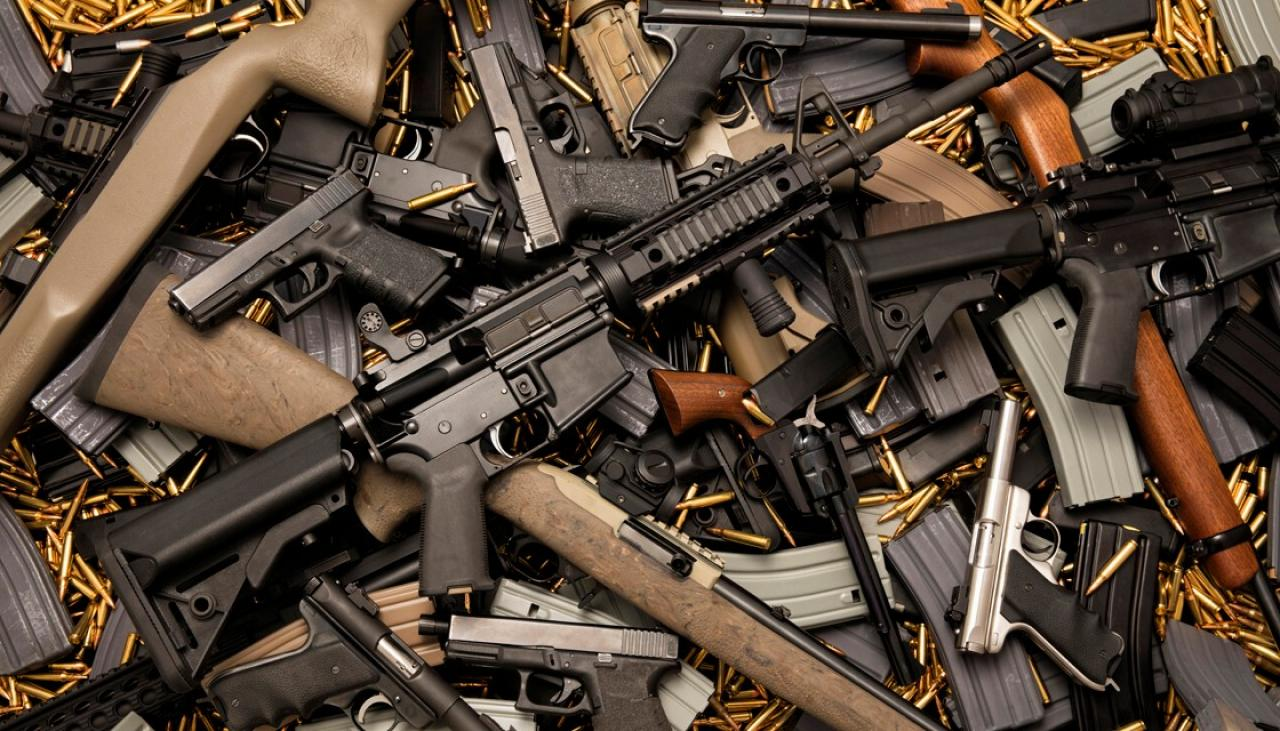

## Table of Contants

**1. Introduction.**

    1.1 The questions handled in this project.
    
**2. Data Wrangling.**

    2.1 Getting to know the Gun dataset.
    
    2.2 Getting to know the Census dataset.
    
    2.3 Data Cleaning
    
**3. Exploratory Data Analysis.**

    3.1 Question 1.
    
    3.2 Question 2.
    
    3.3 Question 3.
    
    3.4 Question 4.
       
**4. Conclusion.**

**5. General Resources.**

## 1. Introduction

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 
he data has been supplemented with state level data from https://www.google.com/url?q=https://www.census.gov/&sa=D&ust=1532469042127000.

### 1.1 The questions handled in this project:
**1.** What census data is most associated with high gun per capita?

**2.** Which states have had the highest growth in gun registrations?

**3.** What is the overall trend of gun purchases?

**4.** which year had the most checks, and by which state. and which had the least?

## 2. Data Wrangling

In this part I'm going to import all the needed libraries, and the two datasets (Gun dataset and Census dataset). At first, I'm going to try and get to know my dataset, how many variables are there? what are the dimensions? what are the types that each dataset contains?. 
Then, I'm going to check whether the datasets need cleaning and trimming or not. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

### 2.1 Getting to know the Gun dataset

In [2]:
## loading the Gun dataset and displaying the first 10 rows
url='https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/data/nics-firearm-background-checks.csv?raw=true'
gun1=pd.read_csv(url)
gun1.head(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-09,Alabama,33228.0,642.0,23455.0,17369.0,1633.0,981,0.0,35.0,...,0.0,0.0,0.0,30.0,19.0,8.0,1.0,2.0,0.0,80478
1,2020-09,Alaska,388.0,2.0,3275.0,3333.0,345.0,201,0.0,1.0,...,0.0,0.0,0.0,8.0,16.0,2.0,1.0,1.0,0.0,7897
2,2020-09,Arizona,8786.0,1198.0,23996.0,12094.0,1963.0,1873,0.0,16.0,...,0.0,0.0,0.0,39.0,13.0,5.0,0.0,0.0,0.0,51287
3,2020-09,Arkansas,3686.0,554.0,9214.0,8003.0,505.0,383,10.0,8.0,...,0.0,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,24043
4,2020-09,California,32998.0,0.0,61258.0,36638.0,7815.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139313
5,2020-09,Colorado,10309.0,24.0,24260.0,15873.0,1919.0,1721,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54479
6,2020-09,Connecticut,9845.0,416.0,6101.0,2284.0,1443.0,0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,20091
7,2020-09,Delaware,470.0,0.0,3501.0,1909.0,176.0,141,0.0,0.0,...,0.0,0.0,0.0,84.0,37.0,4.0,1.0,0.0,0.0,6381
8,2020-09,District of Columbia,901.0,0.0,531.0,11.0,0.0,1,0.0,0.0,...,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1469
9,2020-09,Florida,34496.0,0.0,76685.0,29317.0,5523.0,3174,0.0,13.0,...,26.0,0.0,0.0,482.0,268.0,65.0,42.0,31.0,2.0,154982


In [3]:
#Displaing the last 10 rows
gun1.tail(10)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
14455,1998-11,Tennessee,0.0,NaN,19.0,85.0,NaN,3,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107
14456,1998-11,Texas,0.0,NaN,1384.0,1349.0,NaN,60,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2794
14457,1998-11,Utah,0.0,NaN,98.0,169.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,267
14458,1998-11,Vermont,0.0,NaN,23.0,35.0,NaN,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59
14459,1998-11,Virgin Islands,0.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
14460,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14461,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14462,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14463,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
14464,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


The past two cells make me familiar with most of the variables and entries. It is a quick look at the dataset.

In [4]:
#finding out the dimensions of the dataset
gun1.shape

(14465, 27)

There are 14465 rows and 27 columns in the dataset

In [5]:
#getting more information about the dataset
gun1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14465 entries, 0 to 14464
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14465 non-null  object 
 1   state                      14465 non-null  object 
 2   permit                     14441 non-null  float64
 3   permit_recheck             3080 non-null   float64
 4   handgun                    14445 non-null  float64
 5   long_gun                   14446 non-null  float64
 6   other                      7480 non-null   float64
 7   multiple                   14465 non-null  int64  
 8   admin                      14442 non-null  float64
 9   prepawn_handgun            12522 non-null  float64
 10  prepawn_long_gun           12520 non-null  float64
 11  prepawn_other              7095 non-null   float64
 12  redemption_handgun         12525 non-null  float64
 13  redemption_long_gun        12524 non-null  flo

The **info()** function provides us with a lot of useful information about the dataset. 

There are 14465 entries starting from 0 to 14464, and 27 columns. Also, the names of all the columns are shown, along with their data type and the number of the nonnull entries. And at the end, it states all the data types in the dataset and how many of them are there.

In [6]:
# Calculating the number of missing values in each column
for x in range(1):
    print(gun1.isnull().sum())

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64


I made a function to calculate the number of the missing values in each column, just in case I needed this information later.

In [7]:
# taking a look at some statistical details about the dataset
gun1.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,14441.000000,3080.000000,14445.000000,14446.000000,7480.000000,14465.000000,14442.000000,12522.000000,12520.000000,7095.000000,...,3795.000000,2970.000000,2805.000000,4730.000000,4730.000000,4730.000000,4455.000000,4730.000000,4235.000000,14465.000000
mean,7160.660134,6852.150649,6814.501973,7873.343555,505.399465,292.524162,53.917601,5.144146,7.589137,0.338689,...,2.293281,0.149158,0.154724,24.418182,19.497252,2.758351,0.860606,0.851374,0.115939,24812.636364
std,26264.594279,45588.312382,10112.058750,9164.382320,1354.099433,778.159456,569.589979,11.365380,15.965987,1.314143,...,17.808110,1.013038,0.957151,90.060423,71.277555,11.575735,4.340017,3.719907,0.427026,42351.474525
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1011.000000,2150.000000,27.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4963.000000
50%,757.000000,0.000000,3432.000000,5203.000000,168.000000,133.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13184.000000
75%,5298.000000,47.000000,8269.000000,10603.500000,513.000000,324.000000,0.000000,5.000000,8.000000,0.000000,...,1.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,28295.000000
max,522188.000000,626794.000000,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,592.000000,13.000000,12.000000,1299.000000,993.000000,232.000000,70.000000,62.000000,4.000000,714424.000000


The **describe()** function provide us with some statistical details about each column in the dataset. Such as **count**, which counts the number of non-null values in each field. Also, there's **mean**, which calculates the mean of each column. **std**, which calculates the standard deviation of the values of each column. **min** and **max**, which are the minimum and miximum value respectively in each column. **25%**, **50%** and **75%** are the Quartile of each column, **25%** is the lower percentile, **50%** percentile is same as the median, and **75%** is the upper percentile. 

In [8]:
# Displaying the the columns' names; to have a better look
gun1.columns.values

array(['month', 'state', 'permit', 'permit_recheck', 'handgun',
       'long_gun', 'other', 'multiple', 'admin', 'prepawn_handgun',
       'prepawn_long_gun', 'prepawn_other', 'redemption_handgun',
       'redemption_long_gun', 'redemption_other', 'returned_handgun',
       'returned_long_gun', 'returned_other', 'rentals_handgun',
       'rentals_long_gun', 'private_sale_handgun',
       'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'], dtype=object)

As we can see, it created an array with the columns' names. Also, it provided me with the data type of these names; which is object.

### 2.2 Getting to know the Census dataset
I'm going to repeat the steps I did in **Getting to know the Gun dataset**. So, there will be no comments here, unless there's something that needs to be commented on.

In [9]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a554c_u.s.-census-data/u.s.-census-data.csv'
cen=pd.read_csv(url)
cen.head(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%
5,"Persons under 5 years, percent, April 1, 2010",NaN,6.40%,7.60%,7.10%,6.80%,6.80%,6.80%,5.70%,6.20%,...,0.073,0.064,7.70%,9.50%,5.10%,6.40%,6.50%,5.60%,6.30%,7.10%
6,"Persons under 18 years, percent, July 1, 2016,...",NaN,22.60%,25.20%,23.50%,23.60%,23.20%,22.80%,21.10%,21.50%,...,0.246,0.226,26.20%,30.20%,19.00%,22.20%,22.40%,20.50%,22.30%,23.70%
7,"Persons under 18 years, percent, April 1, 2010",NaN,23.70%,26.40%,25.50%,24.40%,25.00%,24.40%,22.90%,22.90%,...,0.249,0.236,27.30%,31.50%,20.70%,23.20%,23.50%,20.90%,23.60%,24.00%
8,"Persons 65 years and over, percent, July 1, 2...",NaN,16.10%,10.40%,16.90%,16.30%,13.60%,13.40%,16.10%,17.50%,...,0.16,0.157,12.00%,10.50%,18.10%,14.60%,14.80%,18.80%,16.10%,15.00%
9,"Persons 65 years and over, percent, April 1, 2010",NaN,13.80%,7.70%,13.80%,14.40%,11.40%,10.90%,14.20%,14.40%,...,0.143,0.134,10.30%,9.00%,14.60%,12.20%,12.30%,16.00%,13.70%,12.40%


In [10]:
cen.tail(10)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,Value Flags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,-,Either no or too few sample observations were ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,D,Suppressed to avoid disclosure of confidential...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,F,Fewer than 25 firms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
cen.shape

(85, 52)

In [12]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [13]:
for x in range(1):
    print(cen.isnull().sum())

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [14]:
cen.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Households, 2011-2015",(c),"4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,0.023,0.048,50.40%,2.50%,"625,741",7.70%,8.90%,1.50%,4.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


Since this dataset contains object data only, the result of the **describe()** function included **count** which is as mentioned before, counts the number of non-null values in a column. Also, **unique**, which is the number of unique values in each column. **top**, which is the most common value. And **freq**, which is the most common value's frequency.

In [15]:
cen.columns.values

array(['Fact', 'Fact Note', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida',
       'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

### 2.3 Data cleaning

In this part, I'm going to move backwards and forwards between the two datasets while I'm cleaning. I'm going to document every step, and provide some comments in order to make keeping track of the cleaning process easier.

**Note** : Since some states in the Gun dataset were not included in the Census dataset, it would be better to remove them; so it could be easer to merge them later and answer the questions. 

#### Cesus dataset

In [16]:
#Making a copy of the original dataset, and droping the first 2 columns
cen2= cen.copy()
cen2=cen2.drop(['Fact','Fact Note'], axis=1)

I always prefer to create a copy of my original dataset and experiment on it. And when I come up with a satisfying result, I apply it on the original dataset, or simply take the output if it is what I am looking for.
Here, I created a copy of the dataset to work on it, and extract the  missing states (with the help of the  Gun dataset).
And the first step toward that is by deleting the **'Fact'** and **'Fact Note'** columns, so only the states columns will remain. I'm doing this because in the Gun dataset, there's a column with the name **state** that contain all the fifty states of America. But in the Census dataset, there's no such column. Yet, there's columns with the names of each state. So, if I want to extract the missing states, I will first have to create a new column in the census dataset and fill it with the names of the other states' columns.

In [17]:
cen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alabama         65 non-null     object
 1   Alaska          65 non-null     object
 2   Arizona         65 non-null     object
 3   Arkansas        65 non-null     object
 4   California      65 non-null     object
 5   Colorado        65 non-null     object
 6   Connecticut     65 non-null     object
 7   Delaware        65 non-null     object
 8   Florida         65 non-null     object
 9   Georgia         65 non-null     object
 10  Hawaii          65 non-null     object
 11  Idaho           65 non-null     object
 12  Illinois        65 non-null     object
 13  Indiana         65 non-null     object
 14  Iowa            65 non-null     object
 15  Kansas          65 non-null     object
 16  Kentucky        65 non-null     object
 17  Louisiana       65 non-null     object
 18  Maine       

I tend to use the **info()** function after each alteration I make, in order to check my data and see the changes. And, as we can see, the first two columns have been dropped successfully 

In [18]:
#creating a new column, and fill it with the names of the other columns.
cen2['state2'] = pd.Series(cen2.columns.values) 

In [19]:
cen2.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,state2
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501",Alabama
1,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592","9,688,680",...,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767",Alaska
2,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,6.40%,...,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%,Arizona
3,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310","9,687,653",...,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626",Arkansas
4,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,6.40%,...,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%,California


In [20]:
cen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Alabama         65 non-null     object
 1   Alaska          65 non-null     object
 2   Arizona         65 non-null     object
 3   Arkansas        65 non-null     object
 4   California      65 non-null     object
 5   Colorado        65 non-null     object
 6   Connecticut     65 non-null     object
 7   Delaware        65 non-null     object
 8   Florida         65 non-null     object
 9   Georgia         65 non-null     object
 10  Hawaii          65 non-null     object
 11  Idaho           65 non-null     object
 12  Illinois        65 non-null     object
 13  Indiana         65 non-null     object
 14  Iowa            65 non-null     object
 15  Kansas          65 non-null     object
 16  Kentucky        65 non-null     object
 17  Louisiana       65 non-null     object
 18  Maine       

I created a new field and named it **state2**, and it contains only the names of the other columns, which are the names of the states in Census dataset. 

In [21]:
#dropping all the columns except state2 column. 
cen2.drop(cen2.columns.difference(['state2']), 1, inplace=True)

In [22]:
cen2.columns.values

array(['state2'], dtype=object)

In [23]:
cen2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state2  50 non-null     object
dtypes: object(1)
memory usage: 808.0+ bytes


I dropped all the columns except **state2** column. Because in this part, I'm only going to need this column from this dataset for comparison and extraction. 

In [24]:
#dropping all the null values in case there's any.
cen2 = cen2.dropna()
cen2

,state2
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


#### Gun dataset
I'm going to repeat the steps I did above, so there will be no comments here, unless there's something that needs to be commented on.

In [25]:
Gun= gun1.copy()

In [26]:
Gun['state1'] = pd.Series(gun1['state'].unique())

In [27]:
Gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14465 entries, 0 to 14464
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14465 non-null  object 
 1   state                      14465 non-null  object 
 2   permit                     14441 non-null  float64
 3   permit_recheck             3080 non-null   float64
 4   handgun                    14445 non-null  float64
 5   long_gun                   14446 non-null  float64
 6   other                      7480 non-null   float64
 7   multiple                   14465 non-null  int64  
 8   admin                      14442 non-null  float64
 9   prepawn_handgun            12522 non-null  float64
 10  prepawn_long_gun           12520 non-null  float64
 11  prepawn_other              7095 non-null   float64
 12  redemption_handgun         12525 non-null  float64
 13  redemption_long_gun        12524 non-null  flo

Despit that the gun1 dataset already has a **state** column that contais all the states, I'm creating a new column with the name **state1** that contains only the unique ones; since **state** column contains the states repeated 14465 times based on the date. So, in **state1** each state will be mentioned once only.

In [28]:
Gun.drop(Gun.columns.difference(['state1']), 1, inplace=True)

In [29]:
Gun.columns.values

array(['state1'], dtype=object)

In [30]:
Gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14465 entries, 0 to 14464
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state1  55 non-null     object
dtypes: object(1)
memory usage: 113.1+ KB


In [31]:
Gun = Gun.dropna()

In [32]:
Gun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state1  55 non-null     object
dtypes: object(1)
memory usage: 880.0+ bytes


#### Merging Gun and cen2
In this part I'm going to figure out what are the missing states.

In [33]:
Gun

,state1
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District of Columbia
9,Florida


In [34]:
cen2

,state2
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,Florida
9,Georgia


In [35]:
# merging the two datasets
merging = Gun.merge(cen2, how='left', left_on=['state1'], right_on=['state2'])
merging

,state1,state2
0,Alabama,Alabama
1,Alaska,Alaska
2,Arizona,Arizona
3,Arkansas,Arkansas
4,California,California
5,Colorado,Colorado
6,Connecticut,Connecticut
7,Delaware,Delaware
8,District of Columbia,NaN
9,Florida,Florida


The **merge()** function merged the two datasets using only keys from left frame (Gun), it's just like SQL outter join on preserving key order. It merged left on **state1** and right on **state2**. the output of this is a dataframe with both **state1** and **state2** next to each other, and if there's a value in **state1** that's not in **state2** it get replaced with **NaN**. Which is exactly what I'm looking for :)

In [36]:
#extracting the NaN values only
Gun[merging['state2'].isna()]

,state1
8,District of Columbia
11,Guam
21,Mariana Islands
41,Puerto Rico
49,Virgin Islands


And you're looking at the states that were not included in the Census dataset :)

In [37]:
#dropping these states from gun1 
gun1 = gun1[gun1.state != 'Guam']
gun1 = gun1[gun1.state != 'Puerto Rico']
gun1 = gun1[gun1.state != 'District of Columbia']
gun1 = gun1[gun1.state != 'Virgin Islands']
gun1 = gun1[gun1.state != 'Mariana Islands']

In [38]:
gun1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13150 entries, 0 to 14464
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      13150 non-null  object 
 1   state                      13150 non-null  object 
 2   permit                     13148 non-null  float64
 3   permit_recheck             2800 non-null   float64
 4   handgun                    13150 non-null  float64
 5   long_gun                   13150 non-null  float64
 6   other                      6800 non-null   float64
 7   multiple                   13150 non-null  int64  
 8   admin                      13148 non-null  float64
 9   prepawn_handgun            11397 non-null  float64
 10  prepawn_long_gun           11395 non-null  float64
 11  prepawn_other              6450 non-null   float64
 12  redemption_handgun         11400 non-null  float64
 13  redemption_long_gun        11398 non-null  flo

I eliminated the extracted five states from the **Gun** dataset along with any information related to them.

In [39]:
#I'm going to create a table with the data needed to match the Census dataset and prepare it for merging later.
GunCapita= gun1[['month','state','totals']]
GunCapita.head()

,month,state,totals
0,2020-09,Alabama,80478
1,2020-09,Alaska,7897
2,2020-09,Arizona,51287
3,2020-09,Arkansas,24043
4,2020-09,California,139313


In [40]:
GunCapita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13150 entries, 0 to 14464
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   month   13150 non-null  object
 1   state   13150 non-null  object
 2   totals  13150 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 410.9+ KB


I created a new dataframe with only the **month**, **state** and **totals** columns, and it would help me answer one of my questions later.

In [41]:
#convert the month column from object to datetime
GunCapita['month'] = pd.to_datetime(gun1['month'])

<ipython-input-41-faa50fca02f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GunCapita['month'] = pd.to_datetime(gun1['month'])


In [42]:
GunCapita.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13150 entries, 0 to 14464
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   month   13150 non-null  datetime64[ns]
 1   state   13150 non-null  object        
 2   totals  13150 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 410.9+ KB


In [43]:
GunCapita.head()

,month,state,totals
0,2020-09-01,Alabama,80478
1,2020-09-01,Alaska,7897
2,2020-09-01,Arizona,51287
3,2020-09-01,Arkansas,24043
4,2020-09-01,California,139313


Since the **month** column was an **object**, I converted it into **date** so I can extract the needed data easly.

In [44]:
#I'm going to extract the data of the 1st of July,2016 then do the same with the 1st of April,2010
GUN2016= GunCapita[GunCapita['month']== '2016-07-01']
GUN2016.head()

,month,state,totals
2750,2016-07-01,Alabama,48927
2751,2016-07-01,Alaska,6793
2752,2016-07-01,Arizona,34496
2753,2016-07-01,Arkansas,19378
2754,2016-07-01,California,190218


I extracted the 1st of July, 2016 data from the Gun dataset to match the one in the Census dataset. 

In [45]:
GUN2010= GunCapita[GunCapita['month']== '2010-04-01']
GUN2010.head()

,month,state,totals
6875,2010-04-01,Alabama,20791
6876,2010-04-01,Alaska,6411
6877,2010-04-01,Arizona,16578
6878,2010-04-01,Arkansas,14563
6879,2010-04-01,California,80750


I extracted the 1st of April, 2010 data from the Gun dataset to match the one in the Census dataset. 

In [46]:
#check for null values in the columns that matters to me
gun1.isnull().any()

month                        False
state                        False
permit                        True
permit_recheck                True
handgun                      False
long_gun                     False
other                         True
multiple                     False
admin                         True
prepawn_handgun               True
prepawn_long_gun              True
prepawn_other                 True
redemption_handgun            True
redemption_long_gun           True
redemption_other              True
returned_handgun              True
returned_long_gun             True
returned_other                True
rentals_handgun               True
rentals_long_gun              True
private_sale_handgun          True
private_sale_long_gun         True
private_sale_other            True
return_to_seller_handgun      True
return_to_seller_long_gun     True
return_to_seller_other        True
totals                       False
dtype: bool

Since there's no null values in **month**, **state**, **handgun**, **long_gun**, **multiple** and **totals** columns, that leaves me only with **other** column to take care of. But it won't be necessary, since these missing values will not affect my answers.

In [47]:
#creating a new copy of the Census dataset
CEN=cen.copy()

In [48]:
CEN.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [49]:
#dropping 'Fact Note' column since it won't be needed 
CEN=CEN.drop('Fact Note',axis=1)

In [50]:
#setting 'Fact' column as an index
CEN.set_index('Fact',inplace=True)

In [51]:
#applying the transpose method and resetting the index
CEN = CEN.T.reset_index()

In [52]:
CEN.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What I did here is simply making the rows column and the columns rows, so the dataset would be more presentable to me.

In [53]:
#renameing the 'index' column to 'state' so it would make more sense
CEN=CEN.rename(columns={'index':'State'})

In [54]:
CEN.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,NaN,Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
CEN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 86 columns):
 #   Column                                                                                  Non-Null Count  Dtype 
---  ------                                                                                  --------------  ----- 
 0   State                                                                                   50 non-null     object
 1   Population estimates, July 1, 2016,  (V2016)                                            50 non-null     object
 2   Population estimates base, April 1, 2010,  (V2016)                                      50 non-null     object
 3   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)   50 non-null     object
 4   Population, Census, April 1, 2010                                                       50 non-null     object
 5   Persons under 5 years, percent, July 1, 2016,  (V2016)                          

In [56]:
#dropping the unneeded columns
CEN.drop(CEN.iloc[:, 66:86], inplace = True, axis = 1)

In [57]:
CEN.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,"499,926","245,243","182,425","135,313","344,981","46,780","427,582",56.3,"113,594.08","""04"""
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,"231,959","123,158","75,962","35,982","189,029","25,915","192,988",56,"52,035.48","""05"""
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,"3,548,449","1,852,580","1,320,085","1,619,857","1,819,107","252,377","3,176,341",239.1,"155,779.22","""06"""


I removed the unneded columns starting from 66 till 85

In [58]:
#replacing NaN values with 0.0
CEN=CEN.fillna(0.0)

In [59]:
# checking if there's any missing value, and if yes I want to see it
CE = CEN[CEN.isna().any(axis=1)]
CE

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code


Since the output has 0 rows, that means there's no missing value.

Problem has been taken care of :)

What I'm doing next is converting the needed columns from object to float.

In [60]:
#creating a new dataframe with only these columns
CEN16= CEN[['State', 'Population estimates, July 1, 2016,  (V2016)']]
CEN16.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"


In [61]:
#first, instead of (,) I'll put an empty('') as to eliminate the (,)
CEN16['Population estimates, July 1, 2016,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

/Users/yara/opt/anaconda3/envs/second_project/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [62]:
#checking the changes
CEN16.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,4863300
1,Alaska,741894
2,Arizona,6931071
3,Arkansas,2988248
4,California,39250017


In [63]:
#Secons, I'm going to convert the Population estimates, July 1, 2016, (V2016) column from object to float
CEN16['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(CEN16['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')

<ipython-input-63-4082256a6a1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CEN16['Population estimates, July 1, 2016,  (V2016)']= pd.to_numeric(CEN16['Population estimates, July 1, 2016,  (V2016)'], downcast='float', errors='ignore')


In [64]:
#checking the changes
CEN16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   State                                         50 non-null     object 
 1   Population estimates, July 1, 2016,  (V2016)  50 non-null     float32
dtypes: float32(1), object(1)
memory usage: 728.0+ bytes


In [65]:
CEN16.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,4863300.0
1,Alaska,741894.0
2,Arizona,6931071.0
3,Arkansas,2988248.0
4,California,39250016.0


In [66]:
#getting the sum of the 'Population estimates, July 1, 2016,  (V2016)' column
Cen16=CEN16['Population estimates, July 1, 2016,  (V2016)'].sum()
Cen16

322446340.0

Next, I'm going to repeat the previous steps with 2010 data

In [67]:
CEN10= CEN[['State','Population estimates base, April 1, 2010,  (V2016)']]
CEN10

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,"4,780,131"
1,Alaska,"710,249"
2,Arizona,"6,392,301"
3,Arkansas,"2,916,025"
4,California,"37,254,522"
5,Colorado,"5,029,324"
6,Connecticut,"3,574,114"
7,Delaware,"897,936"
8,Florida,"18,804,592"
9,Georgia,"9,688,680"


In [68]:
CEN10['Population estimates base, April 1, 2010,  (V2016)'].replace(to_replace=',',value=r'',regex=True,inplace=True)

/Users/yara/opt/anaconda3/envs/second_project/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [69]:
CEN10.head()

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,4780131
1,Alaska,710249
2,Arizona,6392301
3,Arkansas,2916025
4,California,37254522


In [70]:
CEN10['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(CEN10['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')

<ipython-input-70-c19d831c209f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CEN10['Population estimates base, April 1, 2010,  (V2016)']= pd.to_numeric(CEN10['Population estimates base, April 1, 2010,  (V2016)'], downcast='float', errors='ignore')


In [71]:
CEN10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State                                               50 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float32
dtypes: float32(1), object(1)
memory usage: 728.0+ bytes


In [72]:
CEN10.head()

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,4780131.0
1,Alaska,710249.0
2,Arizona,6392301.0
3,Arkansas,2916025.0
4,California,37254520.0


In [73]:
Cen10 = CEN10['Population estimates base, April 1, 2010,  (V2016)'].sum()
Cen10

308156350.0

#### Merging
In this part, I'm going to merge the datasets.

Preparing the datasets for merging:

In [74]:
CEN16.reset_index(drop=True).head()

Fact,State,"Population estimates, July 1, 2016, (V2016)"
0,Alabama,4863300.0
1,Alaska,741894.0
2,Arizona,6931071.0
3,Arkansas,2988248.0
4,California,39250016.0


In [75]:
CEN10.reset_index(drop=True).head()

Fact,State,"Population estimates base, April 1, 2010, (V2016)"
0,Alabama,4780131.0
1,Alaska,710249.0
2,Arizona,6392301.0
3,Arkansas,2916025.0
4,California,37254520.0


In [76]:
GUN2010= GUN2010.reset_index(drop=True)
GUN2010.head()

,month,state,totals
0,2010-04-01,Alabama,20791
1,2010-04-01,Alaska,6411
2,2010-04-01,Arizona,16578
3,2010-04-01,Arkansas,14563
4,2010-04-01,California,80750


In [77]:
GUN2016=GUN2016.reset_index(drop= True)
GUN2016.head()

,month,state,totals
0,2016-07-01,Alabama,48927
1,2016-07-01,Alaska,6793
2,2016-07-01,Arizona,34496
3,2016-07-01,Arkansas,19378
4,2016-07-01,California,190218


In [78]:
#merging the Census 2010 and 2016 data to use it in answering question1
CenMerged = CEN10.merge(CEN16, on='State', how='left')
CenMerged.head()

Fact,State,"Population estimates base, April 1, 2010, (V2016)","Population estimates, July 1, 2016, (V2016)"
0,Alabama,4780131.0,4863300.0
1,Alaska,710249.0,741894.0
2,Arizona,6392301.0,6931071.0
3,Arkansas,2916025.0,2988248.0
4,California,37254520.0,39250016.0


In [79]:
CenMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   State                                               50 non-null     object 
 1   Population estimates base, April 1, 2010,  (V2016)  50 non-null     float32
 2   Population estimates, July 1, 2016,  (V2016)        50 non-null     float32
dtypes: float32(2), object(1)
memory usage: 1.2+ KB


In [80]:
##merging the Gun 2010 and 2016 data to use it in answering question1
GunMerged= GUN2010.merge(GUN2016, on='state', how='left')
GunMerged.head()

,month_x,state,totals_x,month_y,totals_y
0,2010-04-01,Alabama,20791,2016-07-01,48927
1,2010-04-01,Alaska,6411,2016-07-01,6793
2,2010-04-01,Arizona,16578,2016-07-01,34496
3,2010-04-01,Arkansas,14563,2016-07-01,19378
4,2010-04-01,California,80750,2016-07-01,190218


In [81]:
GunMerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month_x   50 non-null     datetime64[ns]
 1   state     50 non-null     object        
 2   totals_x  50 non-null     int64         
 3   month_y   50 non-null     datetime64[ns]
 4   totals_y  50 non-null     int64         
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 2.3+ KB


In [82]:
# a method to convert whatever value to percentage value
def prcnt(x):
    percentage= x*100
    return percentage

I created a method that calculates percentage of a value. I will needed it later.

## 3. Exploratory Data Analysis

### 3.1 Question 1: gun per capita
What is the approximated number of commoners gun registration per capita in 2010 and 2016

In [83]:
#Gun per capita in 2010
Capita10= GunMerged['totals_x'].sum()/CenMerged['Population estimates base, April 1, 2010,  (V2016)'].sum()
Capita10

0.003978133152355075

What I did here is getting the sum of the **totals_x** column (which is the totals of the year 2010), then divide it by the sum of the **Population estimates base, April 1, 2010,  (V2016)** column. The result is the number of gun registration per capita in 2010.

In [84]:
#getting the percentage
prcnt(Capita10)

0.39781331523550745

In [85]:
#Gun per capita in 2016
Capita16= GunMerged['totals_y'].sum()/CenMerged['Population estimates, July 1, 2016,  (V2016)'].sum()
Capita16

0.00677793404977627

In [86]:
#getting the percentage
prcnt(Capita16)

0.677793404977627

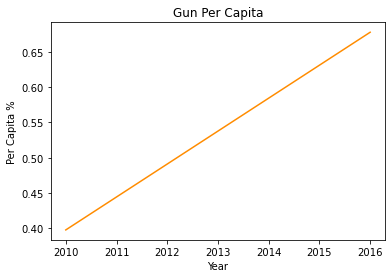

In [87]:
#ploting the relationship of gun per capita for 2010 and 2016
PerCapita= [0.39781331523550745, 0.677793404977627]
Year= [2010,2016]

plt.title('Gun Per Capita')
plt.xlabel('Year')
plt.ylabel('Per Capita %')
plt.plot(Year, PerCapita,'darkorange')
plt.show()

### Answers:
- 2010's gun per capita is 0.39781331523550745%
- 2016's gun per capita is 0.677793404977627%

And as the chart shows, it has increased since 2010 by approximetly 70% 

### 3.2 Question 2: gun registrations
Which states have had the highest growth in gun registrations?

In [116]:
gun1.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-09,Alabama,33228.0,642.0,23455.0,17369.0,1633.0,981,0.0,35.0,...,0.0,0.0,0.0,30.0,19.0,8.0,1.0,2.0,0.0,80478
1,2020-09,Alaska,388.0,2.0,3275.0,3333.0,345.0,201,0.0,1.0,...,0.0,0.0,0.0,8.0,16.0,2.0,1.0,1.0,0.0,7897
2,2020-09,Arizona,8786.0,1198.0,23996.0,12094.0,1963.0,1873,0.0,16.0,...,0.0,0.0,0.0,39.0,13.0,5.0,0.0,0.0,0.0,51287
3,2020-09,Arkansas,3686.0,554.0,9214.0,8003.0,505.0,383,10.0,8.0,...,0.0,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,24043
4,2020-09,California,32998.0,0.0,61258.0,36638.0,7815.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139313


In [89]:
#craeting a dataframe that copies only the dates that starts with 2020 from the Gun datset
G2020 = gun1[gun1['month'].str.match('2020')]
G2020.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-09,Alabama,33228.0,642.0,23455.0,17369.0,1633.0,981,0.0,35.0,...,0.0,0.0,0.0,30.0,19.0,8.0,1.0,2.0,0.0,80478
1,2020-09,Alaska,388.0,2.0,3275.0,3333.0,345.0,201,0.0,1.0,...,0.0,0.0,0.0,8.0,16.0,2.0,1.0,1.0,0.0,7897
2,2020-09,Arizona,8786.0,1198.0,23996.0,12094.0,1963.0,1873,0.0,16.0,...,0.0,0.0,0.0,39.0,13.0,5.0,0.0,0.0,0.0,51287
3,2020-09,Arkansas,3686.0,554.0,9214.0,8003.0,505.0,383,10.0,8.0,...,0.0,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,24043
4,2020-09,California,32998.0,0.0,61258.0,36638.0,7815.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139313


In [90]:
G2020.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
490,2020-01,Virginia,360.0,361.0,36391.0,21424.0,9713.0,0,4.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68420
491,2020-01,Washington,15767.0,429.0,18390.0,8842.0,3813.0,51,24.0,1.0,...,14.0,0.0,0.0,271.0,208.0,84.0,1.0,7.0,1.0,49714
492,2020-01,West Virginia,2697.0,135.0,6543.0,5664.0,422.0,432,1.0,11.0,...,1.0,0.0,0.0,9.0,4.0,1.0,0.0,0.0,0.0,17974
493,2020-01,Wisconsin,11587.0,731.0,14521.0,9835.0,1168.0,49,0.0,0.0,...,3.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,38349
494,2020-01,Wyoming,550.0,1.0,2135.0,1656.0,185.0,107,1.0,0.0,...,0.0,0.0,0.0,68.0,13.0,0.0,0.0,2.0,0.0,4984


This way I only extracted the data of the year 2020.

**Source:** https://stackoverflow.com/questions/17957890/pandas-select-from-dataframe-using-startswith

In [91]:
#sorting the total in a descending way based on the totals column
G2020.sort_values(by=['totals'], axis = 0, ascending = False).head(30)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
124,2020-07,Illinois,42167.0,626794.0,31853.0,12250.0,0.0,1360,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,714424
179,2020-06,Illinois,73508.0,566780.0,49101.0,14913.0,0.0,2102,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,706404
234,2020-05,Illinois,25190.0,598361.0,26854.0,9959.0,0.0,1106,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,661470
344,2020-03,Illinois,39780.0,541682.0,44112.0,17127.0,0.0,2408,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645109
289,2020-04,Illinois,25857.0,563741.0,30500.0,11184.0,0.0,1282,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,632564
399,2020-02,Illinois,13769.0,572881.0,22743.0,9761.0,0.0,913,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,620067
454,2020-01,Illinois,17551.0,561765.0,22567.0,9588.0,0.0,940,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,612411
69,2020-08,Illinois,39261.0,504311.0,28864.0,13330.0,0.0,1458,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,587224
14,2020-09,Illinois,33632.0,344401.0,27645.0,13848.0,0.0,1504,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,421030
403,2020-02,Kentucky,1993.0,365823.0,15294.0,8763.0,668.0,1096,1.0,34.0,...,0.0,0.0,0.0,37.0,24.0,3.0,0.0,1.0,0.0,398247


<AxesSubplot:title={'center':'Gun registration per state in 2020'}, xlabel='States', ylabel='Totals'>

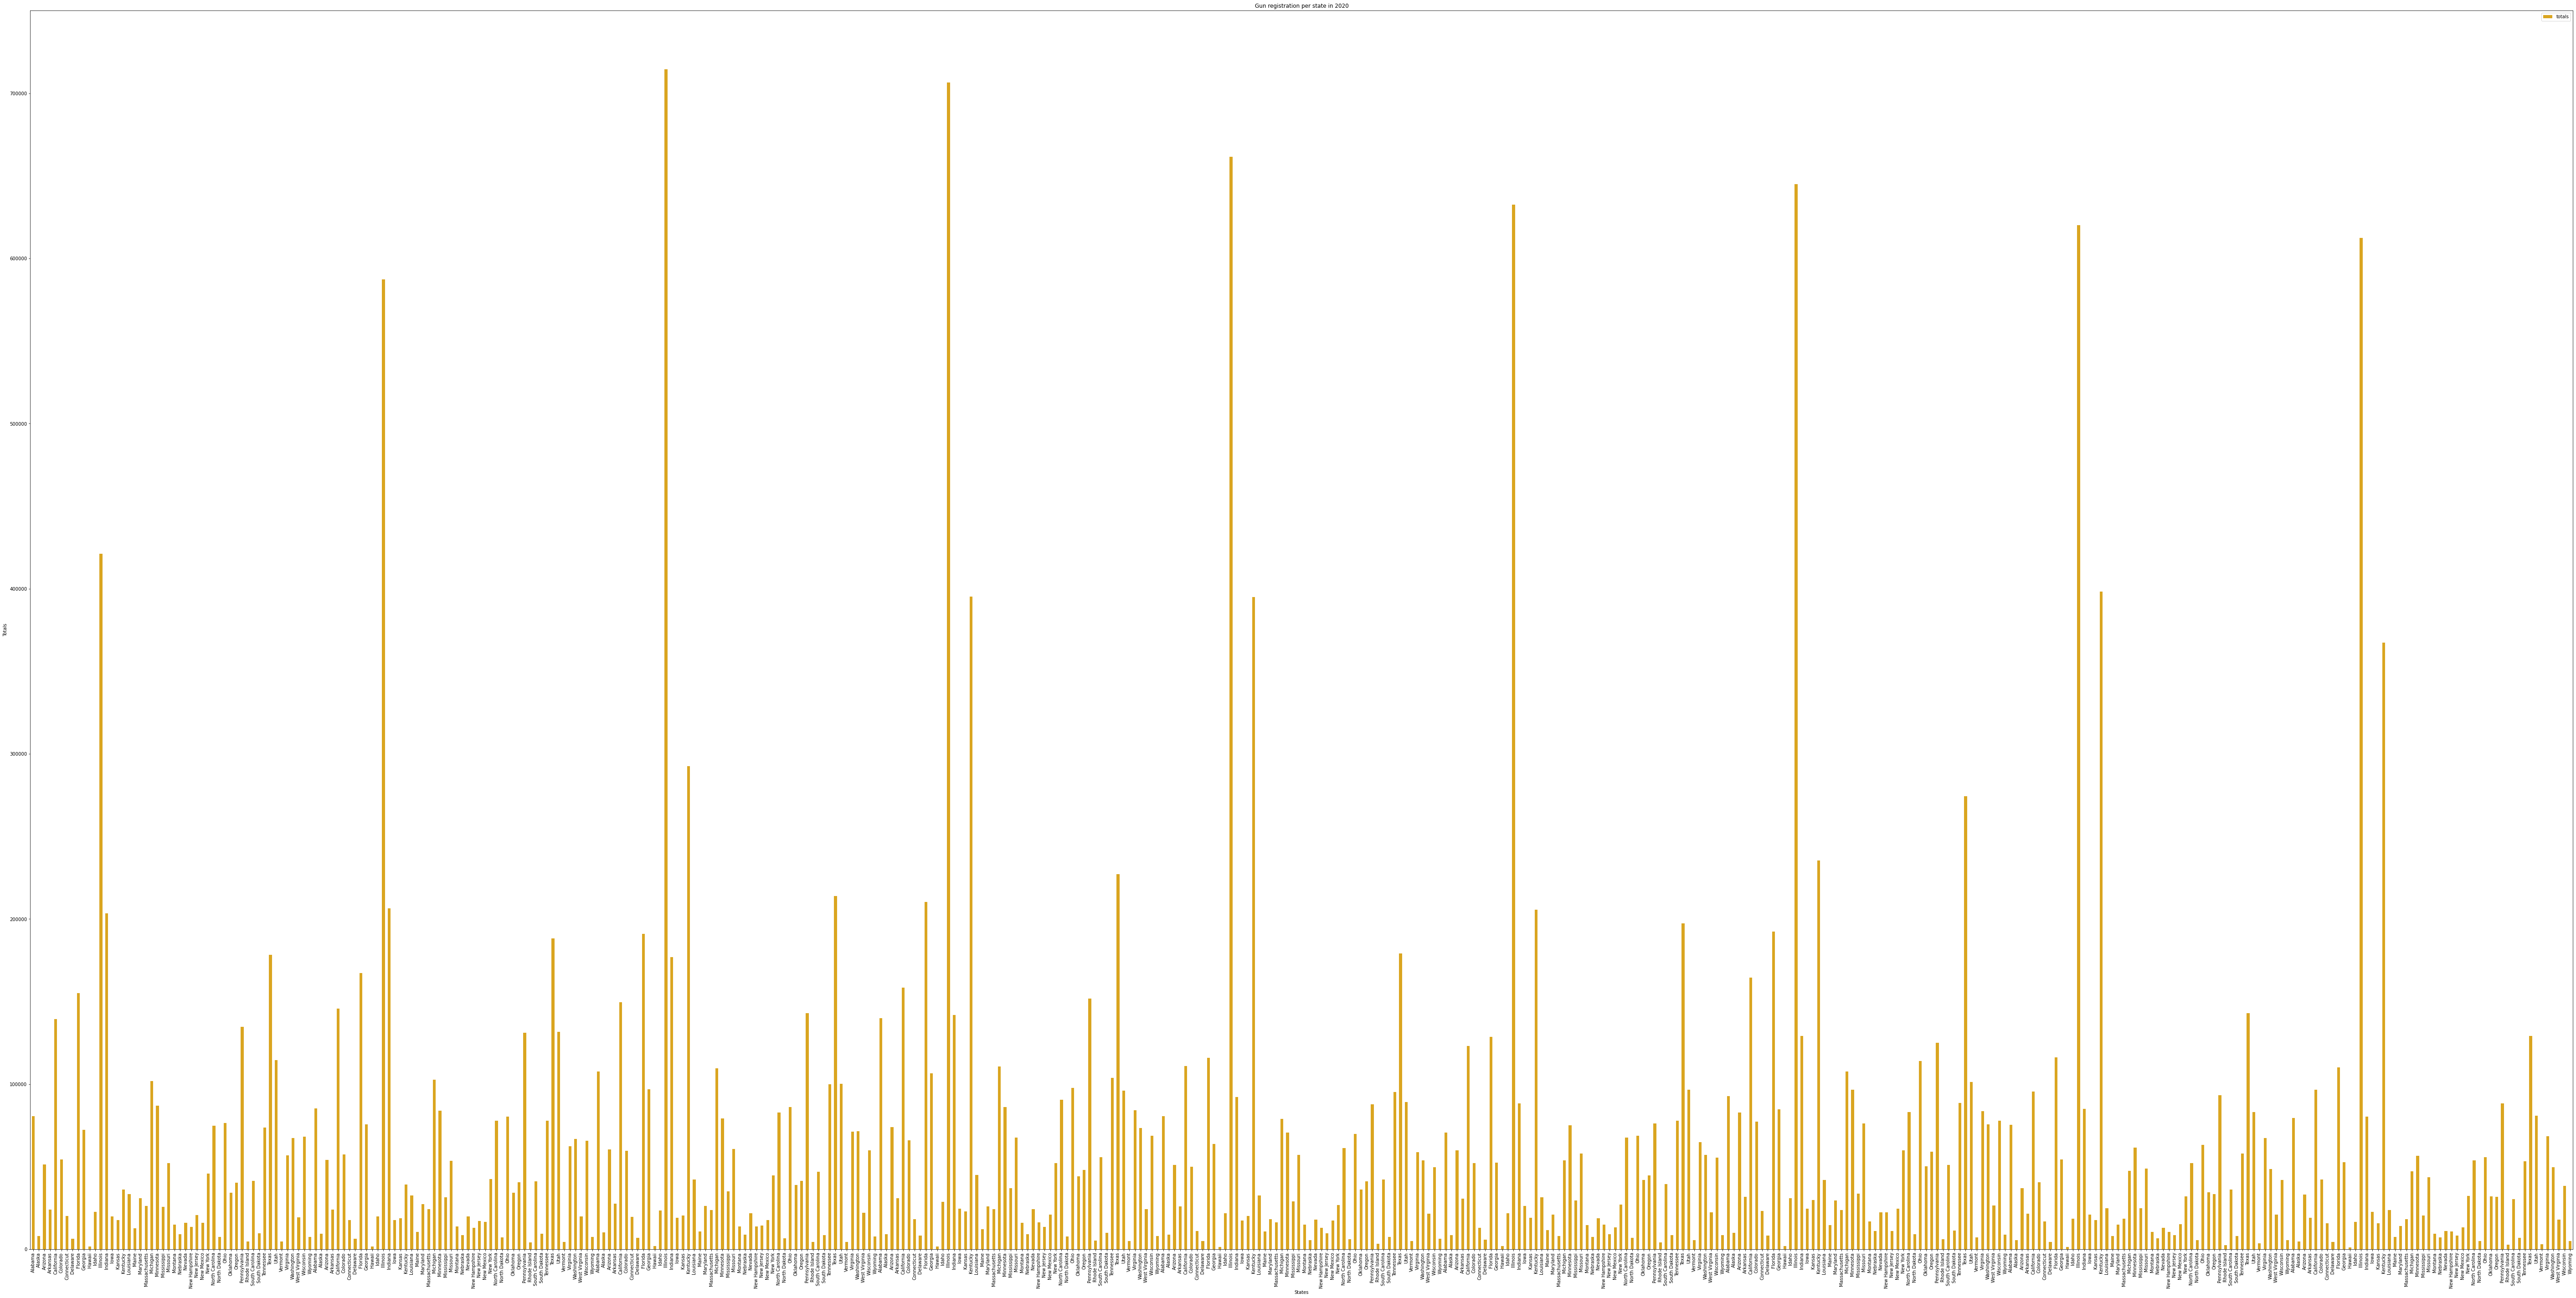

In [92]:
#plotting the relationship and finding the highest gun ownership in 2020 based on the states
G2020.plot(x='state', y='totals', kind='bar',color='goldenrod',figsize = (100,50), xlabel='States', ylabel='Totals',title='Gun registration per state in 2020' )

We can see from the graph that **Illinois** state is the highest state with gun ownership in 2020.

Next, I'm going to do the same with the years 2019, and 2018 to compare the three years.

In [93]:
G2019=gun1[gun1['month'].str.match('2019')]
G2019.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
495,2019-12,Alabama,33683.0,485.0,33020.0,25882.0,1560.0,1382,0.0,42.0,...,0.0,0.0,0.0,53.0,31.0,8.0,1.0,6.0,0.0,100100
496,2019-12,Alaska,386.0,13.0,3455.0,3080.0,397.0,215,0.0,2.0,...,0.0,0.0,0.0,18.0,13.0,1.0,0.0,0.0,0.0,7840
497,2019-12,Arizona,4536.0,649.0,18178.0,10423.0,1560.0,1109,0.0,8.0,...,2.0,0.0,0.0,20.0,6.0,2.0,0.0,0.0,0.0,38171
498,2019-12,Arkansas,2339.0,638.0,8671.0,10957.0,531.0,458,3.0,10.0,...,0.0,0.0,0.0,10.0,16.0,3.0,0.0,1.0,0.0,25699
499,2019-12,California,29544.0,0.0,40637.0,30780.0,4883.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,106600


In [94]:
G2019.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1150,2019-01,Virginia,1061.0,118.0,20600.0,12813.0,3209.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37857
1151,2019-01,Washington,18889.0,53.0,17487.0,10889.0,3622.0,863,7.0,15.0,...,13.0,0.0,0.0,776.0,622.0,85.0,15.0,5.0,2.0,56051
1152,2019-01,West Virginia,2438.0,0.0,5355.0,4964.0,379.0,382,4.0,8.0,...,0.0,0.0,0.0,15.0,9.0,0.0,0.0,0.0,0.0,15320
1153,2019-01,Wisconsin,11124.0,300.0,12204.0,9154.0,1310.0,43,0.0,0.0,...,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,34545
1154,2019-01,Wyoming,357.0,11.0,1530.0,1621.0,175.0,99,2.0,0.0,...,0.0,0.0,0.0,3.0,4.0,1.0,0.0,0.0,0.0,4075


In [95]:
G2019.sort_values(by=['totals'], axis = 0, ascending = False).head(50)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
509,2019-12,Illinois,15241.0,493794.0,24792.0,13258.0,0.0,1107,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,548192
729,2019-08,Illinois,13542.0,448997.0,19105.0,9281.0,0.0,790,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,491715
674,2019-09,Illinois,13011.0,442109.0,17639.0,9512.0,0.0,891,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,483162
619,2019-10,Illinois,12414.0,437512.0,17482.0,10040.0,0.0,881,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,478329
564,2019-11,Illinois,12356.0,403014.0,21597.0,12115.0,0.0,1002,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450084
784,2019-07,Illinois,10764.0,405293.0,15782.0,6889.0,0.0,730,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,439458
949,2019-04,Illinois,14158.0,360461.0,21307.0,8748.0,0.0,790,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,405464
513,2019-12,Kentucky,1160.0,369253.0,16185.0,14471.0,729.0,753,42.0,31.0,...,0.0,0.0,0.0,31.0,32.0,3.0,1.0,1.0,2.0,405291
568,2019-11,Kentucky,1372.0,360423.0,12094.0,12686.0,528.0,738,5.0,29.0,...,0.0,0.0,0.0,20.0,27.0,0.0,0.0,2.0,0.0,391747
894,2019-05,Illinois,13168.0,342314.0,17976.0,7587.0,0.0,726,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,381771


<AxesSubplot:title={'center':'Gun registration per state in 2019'}, xlabel='States', ylabel='Totals'>

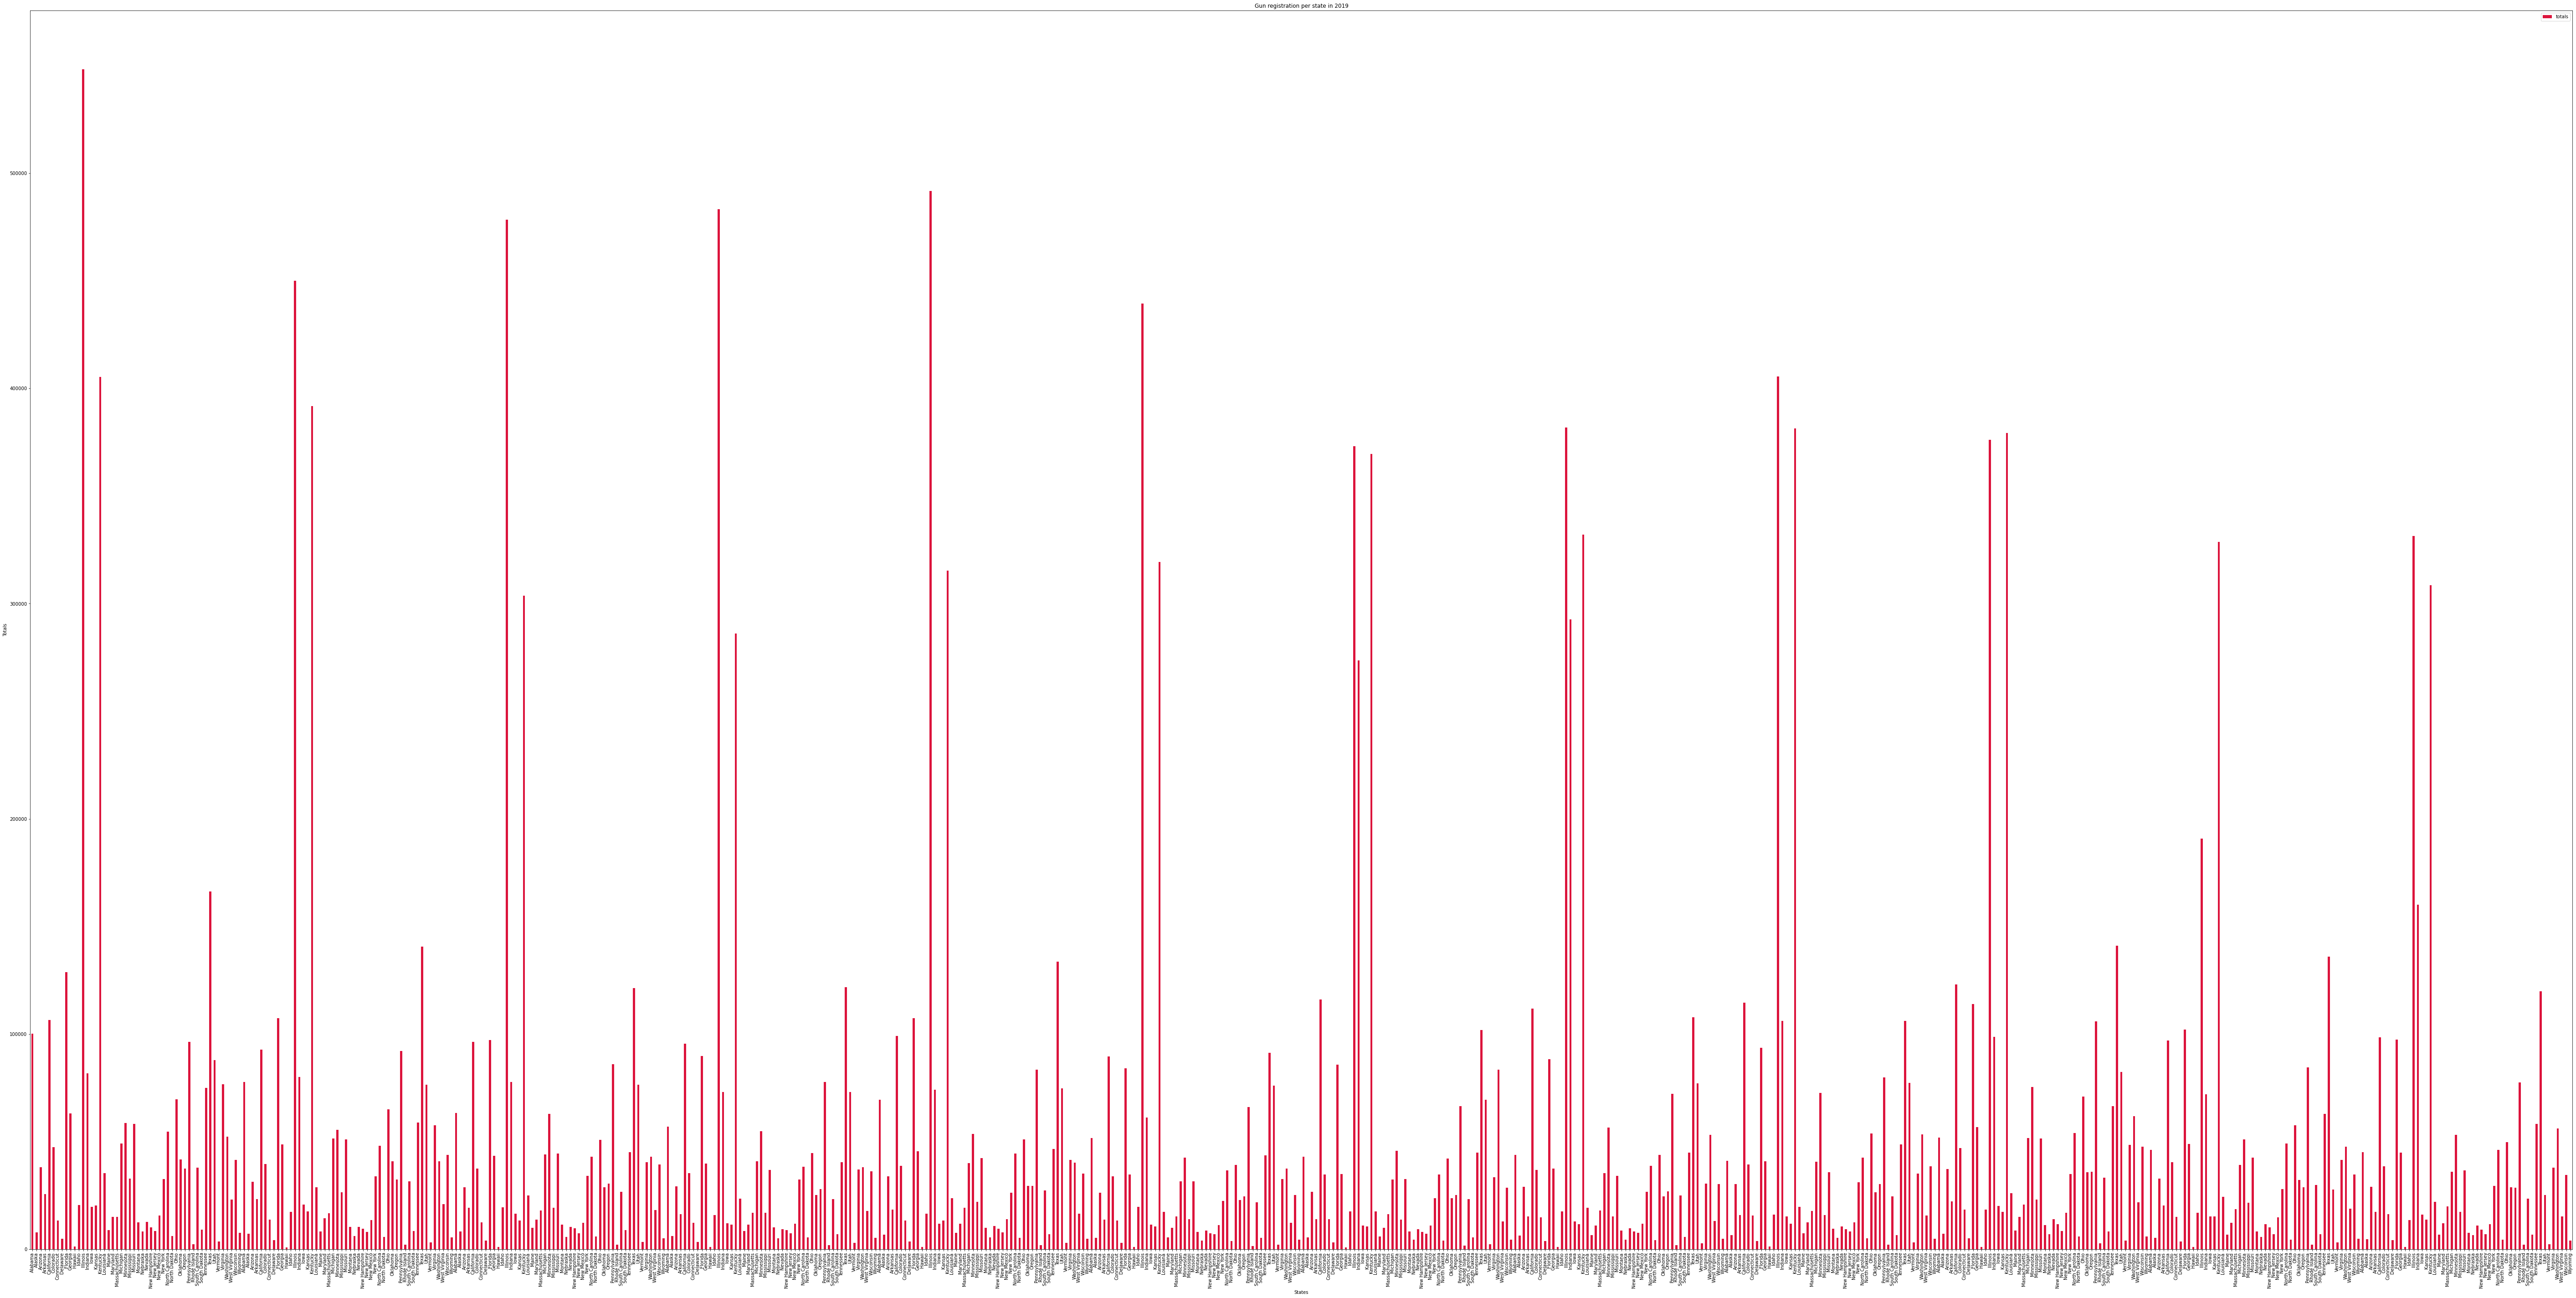

In [96]:
#plotting the relationship and finding the highest gun ownership in 2019 based on the states
G2019.plot(x='state', y='totals', kind='bar',color='crimson',figsize = (100,50), xlabel='States', ylabel='Totals',title='Gun registration per state in 2019' )

We can see from the graph that **Illinois** state is the highest state with gun ownership in 2019.

In [97]:
G2018=gun1[gun1['month'].str.match('2018')]
G2018.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1155,2018-12,Alabama,26029.0,242.0,11463.0,13578.0,464.0,417,0.0,11.0,...,0.0,0.0,0.0,18.0,12.0,2.0,1.0,2.0,1.0,54383
1156,2018-12,Alaska,215.0,11.0,2956.0,3278.0,312.0,155,0.0,0.0,...,0.0,0.0,0.0,11.0,10.0,2.0,0.0,0.0,0.0,7251
1157,2018-12,Arizona,4732.0,394.0,15533.0,11436.0,1451.0,874,0.0,10.0,...,2.0,0.0,0.0,15.0,12.0,1.0,1.0,0.0,1.0,36275
1158,2018-12,Arkansas,2498.0,806.0,8138.0,11736.0,369.0,398,58.0,9.0,...,0.0,0.0,0.0,14.0,30.0,3.0,3.0,2.0,0.0,26272
1159,2018-12,California,30754.0,0.0,40445.0,34180.0,3808.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110017


In [98]:
G2018.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1810,2018-01,Virginia,1109.0,2.0,19443.0,12248.0,2374.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35206
1811,2018-01,Washington,18112.0,76.0,16327.0,9811.0,2170.0,623,3.0,16.0,...,7.0,0.0,0.0,919.0,666.0,51.0,6.0,9.0,0.0,51432
1812,2018-01,West Virginia,2838.0,0.0,5128.0,4452.0,316.0,308,23.0,24.0,...,1.0,0.0,0.0,25.0,28.0,2.0,0.0,1.0,1.0,15102
1813,2018-01,Wisconsin,16462.0,0.0,10484.0,8337.0,945.0,49,0.0,0.0,...,1.0,0.0,0.0,0.0,35.0,0.0,0.0,0.0,0.0,36791
1814,2018-01,Wyoming,384.0,11.0,1460.0,1534.0,138.0,91,4.0,1.0,...,0.0,0.0,0.0,11.0,9.0,0.0,1.0,3.0,0.0,3971


In [99]:
G2018.sort_values(by=['totals'], axis = 0, ascending = False).head(30)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
1228,2018-11,Kentucky,393953.0,0.0,10506.0,12670.0,437.0,888,1.0,25.0,...,0.0,0.0,0.0,27.0,27.0,3.0,0.0,1.0,0.0,422343
1668,2018-03,Kentucky,390708.0,0.0,14642.0,10303.0,818.0,727,5.0,26.0,...,0.0,0.0,0.0,31.0,33.0,6.0,0.0,2.0,1.0,421247
1723,2018-02,Kentucky,387471.0,0.0,13917.0,9302.0,532.0,1001,4.0,30.0,...,0.0,0.0,0.0,23.0,36.0,5.0,0.0,1.0,0.0,417418
1283,2018-10,Kentucky,394208.0,0.0,7065.0,8001.0,360.0,523,7.0,18.0,...,0.0,0.0,0.0,10.0,22.0,1.0,1.0,0.0,0.0,413568
1393,2018-08,Kentucky,393679.0,0.0,7250.0,6241.0,306.0,490,4.0,18.0,...,0.0,0.0,0.0,30.0,45.0,1.0,0.0,1.0,0.0,411800
1503,2018-06,Kentucky,395679.0,0.0,7130.0,4686.0,304.0,523,0.0,22.0,...,0.0,0.0,0.0,26.0,25.0,2.0,1.0,0.0,0.0,411606
1613,2018-04,Kentucky,390433.0,0.0,8893.0,6662.0,439.0,488,3.0,16.0,...,0.0,0.0,0.0,9.0,23.0,2.0,0.0,0.0,1.0,409485
1338,2018-09,Kentucky,393160.0,0.0,6603.0,6014.0,300.0,448,1.0,25.0,...,0.0,0.0,0.0,25.0,23.0,0.0,0.0,1.0,0.0,409385
1173,2018-12,Kentucky,371756.0,0.0,14189.0,14309.0,581.0,618,1.0,16.0,...,0.0,0.0,0.0,43.0,39.0,1.0,0.0,0.0,0.0,404143
1778,2018-01,Kentucky,384989.0,0.0,8202.0,5736.0,323.0,394,0.0,16.0,...,0.0,0.0,0.0,17.0,25.0,2.0,1.0,0.0,0.0,402376


<AxesSubplot:title={'center':'Gun registration per state in 2018'}, xlabel='States', ylabel='Totals'>

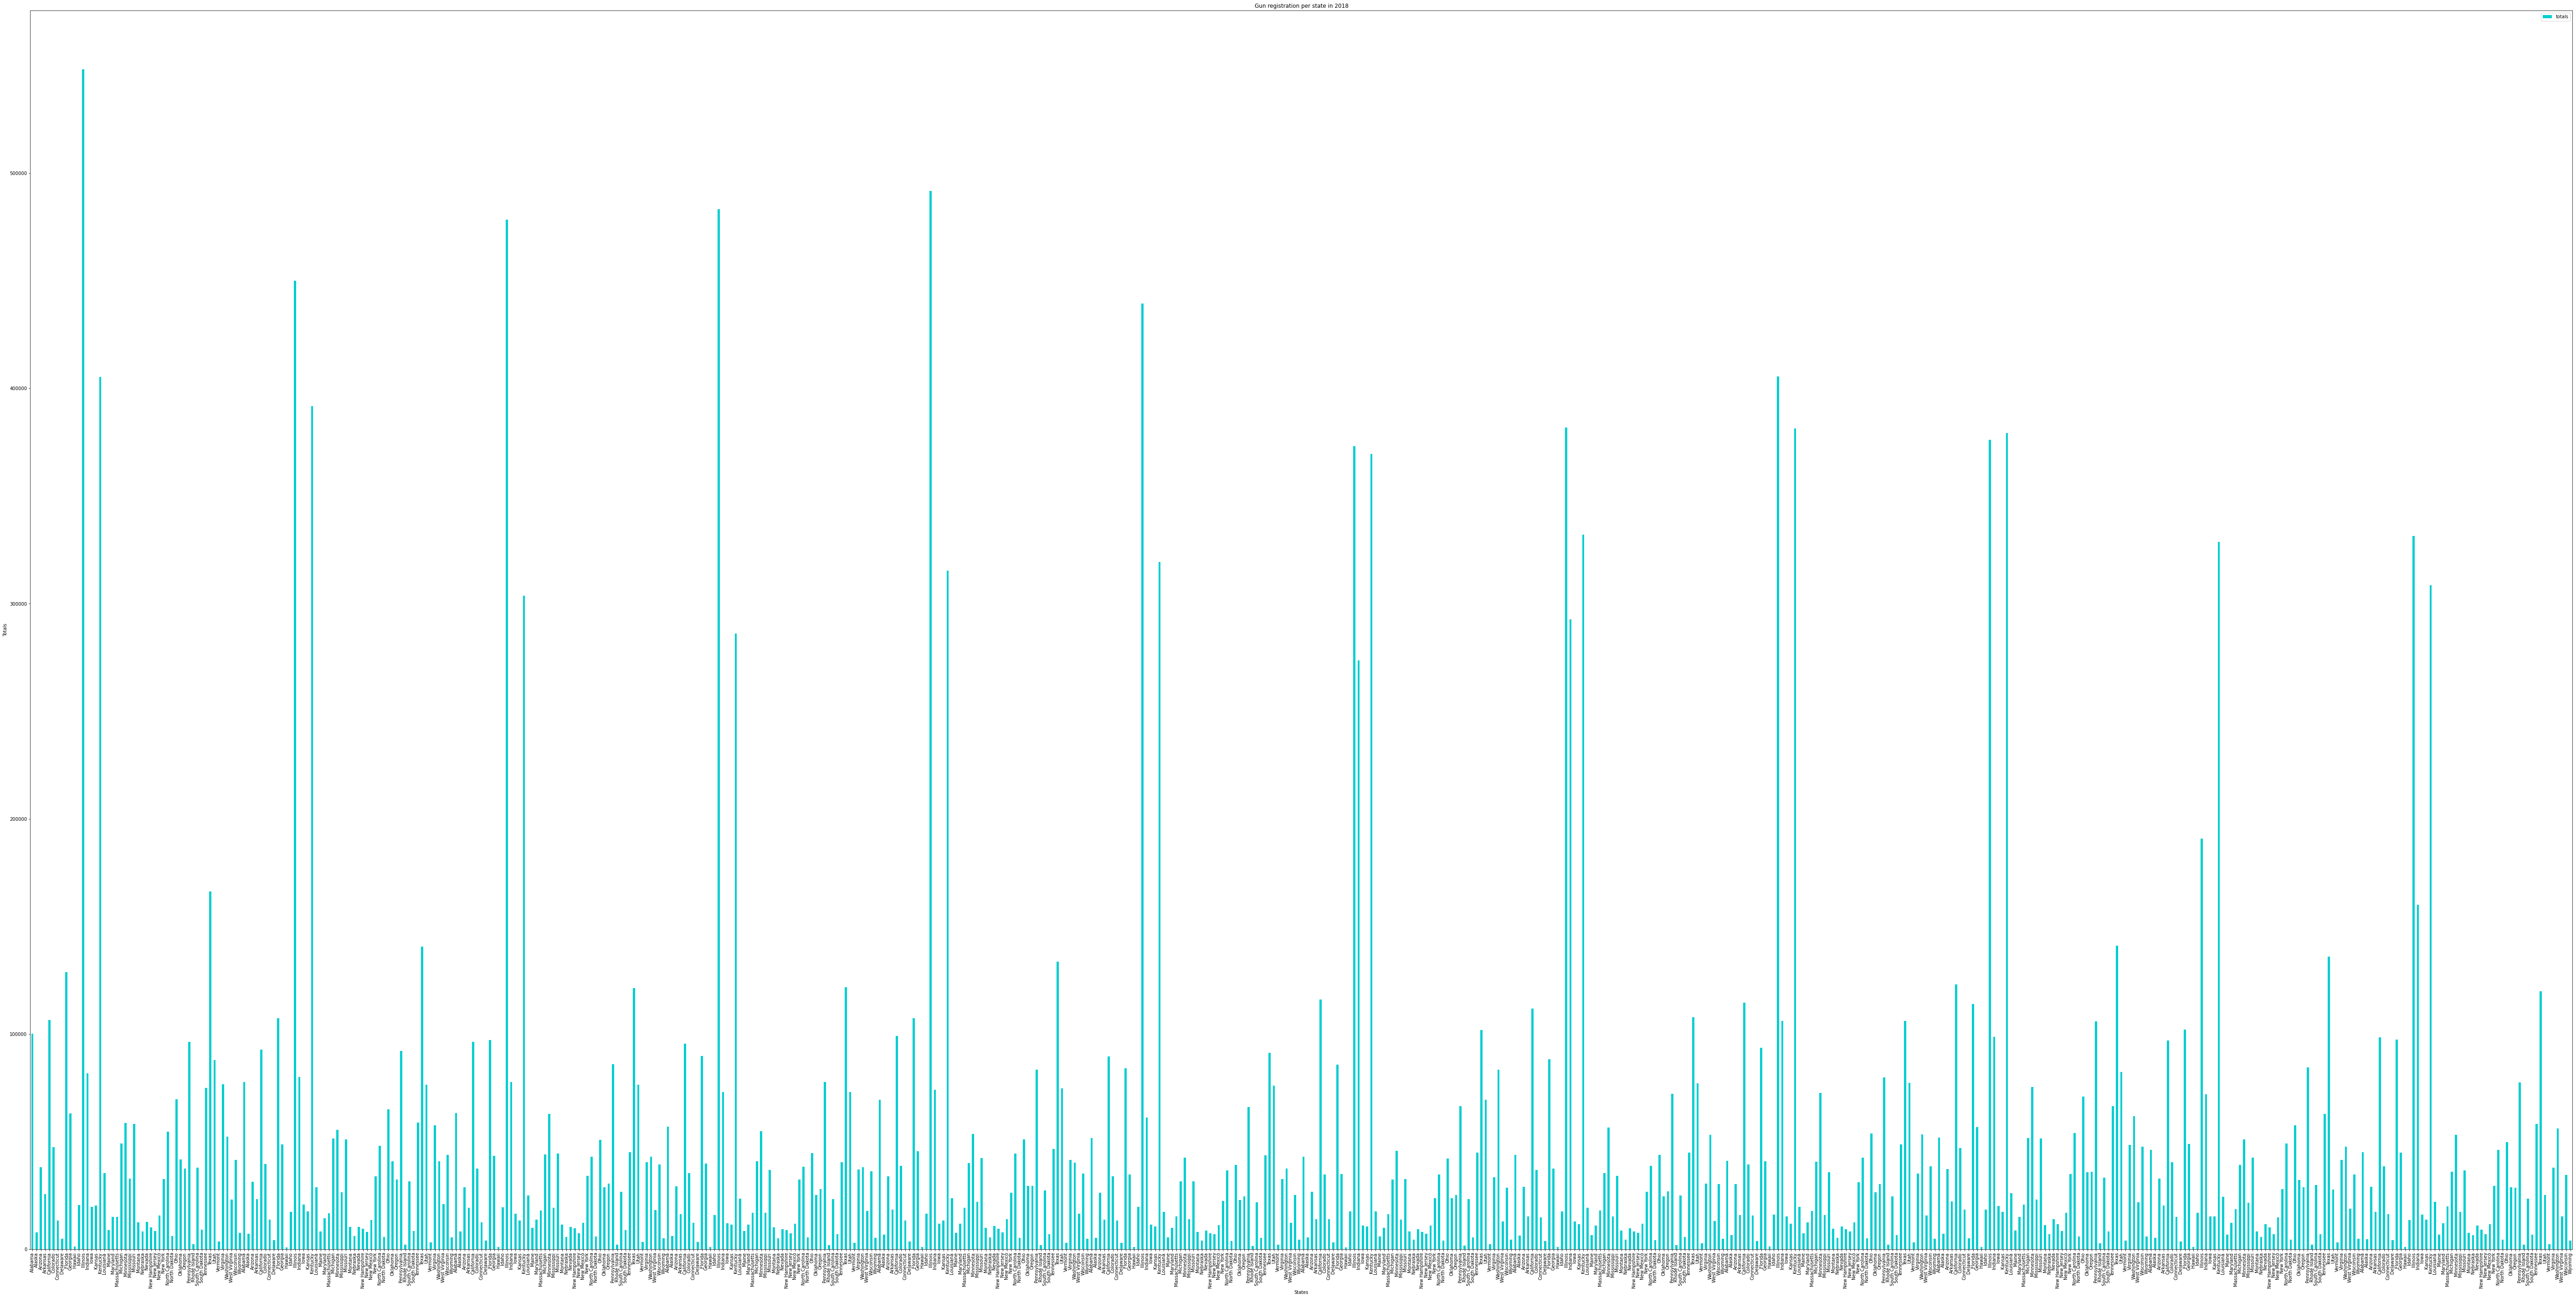

In [100]:
#plotting the relationship and finding the highest gun ownership in 2018 based on the states
G2019.plot(x='state', y='totals', kind='bar',color='darkturquoise',figsize = (100,50), xlabel='States', ylabel='Totals',title='Gun registration per state in 2018' )

we can see from the graph that **Kentucky** state is the highest state with gun ownership in 2018.

### Answers:

**The states with the highest gun registration in 2018:**

**1.** Kentucky.

**2.** Illinois.

**3.** Texas.

**4.** Florida.

**5.** California.

**The states with the highest gun registration in 2019:**

**1.** Illinois.

**2.** Kentucky.

**3.** Indiana.

**4.** Texas.

**5.** Florida.

**The states with the highest gun registration in 2020:**

the dataset stops at september, so these are the highest till now.

**1.** Illinois.

**2.** Kentucky.

**3.** Texas.

**4.** Florida.

**5.** Indiana.

 And as we can see, these five states (Illinois, Kentucky, Texas, Florida and Indiana) are the top 5 for three years.

### 3.3 Question 3: Overall gun trend
What is the overall trend of gun purchases?

In [101]:
#in 2020
G2020.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-09,Alabama,33228.0,642.0,23455.0,17369.0,1633.0,981,0.0,35.0,...,0.0,0.0,0.0,30.0,19.0,8.0,1.0,2.0,0.0,80478
1,2020-09,Alaska,388.0,2.0,3275.0,3333.0,345.0,201,0.0,1.0,...,0.0,0.0,0.0,8.0,16.0,2.0,1.0,1.0,0.0,7897
2,2020-09,Arizona,8786.0,1198.0,23996.0,12094.0,1963.0,1873,0.0,16.0,...,0.0,0.0,0.0,39.0,13.0,5.0,0.0,0.0,0.0,51287
3,2020-09,Arkansas,3686.0,554.0,9214.0,8003.0,505.0,383,10.0,8.0,...,0.0,0.0,0.0,3.0,12.0,3.0,0.0,0.0,0.0,24043
4,2020-09,California,32998.0,0.0,61258.0,36638.0,7815.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139313


The types on firearms are **handgun**, **long gun**, **other** and **multiple**. I'm going to find the sum of each one of them so I can plot the relationship and find out which firearme is moset purchased.

In [102]:
G2020['handgun'].sum()

9000541.0

In [103]:
G2020['long_gun'].sum()

4891755.0

In [104]:
G2020['other'].sum()

636067.0

In [105]:
G2020['multiple'].sum()

297110

In [106]:
#creating a list of the firearms types
Type= ['Handgun', 'Long Gun', 'Other', 'Multiple']

In [107]:
#creating a list of sum result
bought=[9000541, 4891755, 636067, 297110]

I created the two lists in order to plot the relationship.

In [108]:
#to determine the x axis ticks
Type2=np.arange(len(Type))
Type2

array([0, 1, 2, 3])

In [109]:
#this code is not necessary, I only wanted to present the values on the y axis in a better way that's all.
def Million(Type2, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (Type2 * 1e-6)

In [110]:
Format = FuncFormatter(Million)

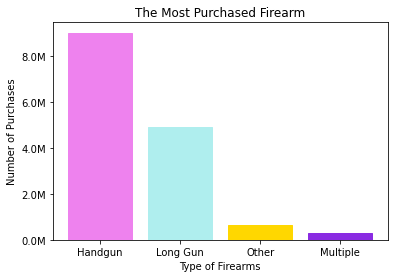

In [111]:
fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(Format)
plt.title('The Most Purchased Firearm')
plt.ylabel('Number of Purchases')
plt.xlabel('Type of Firearms')
color=plt.bar(Type2, bought)
color[0].set_color('violet')
color[1].set_color('paleturquoise')
color[2].set_color('gold')
color[3].set_color('blueviolet')
plt.xticks(Type2, Type)
plt.show()

**source:** https://matplotlib.org/3.1.0/gallery/ticks_and_spines/custom_ticker1.html#sphx-glr-gallery-ticks-and-spines-custom-ticker1-py

**source:** https://www.semicolonworld.com/question/58048/setting-different-bar-color-in-matplotlib-python

**source:** https://matplotlib.org/3.1.0/gallery/color/named_colors.html

### Answers:

**The most purchased guns in the USA from the begining of this year (which is 2020) till now, arranged from highest to lowest:**

**1.** Handguns, with about 9000541 checks.

**2.** Long guns, with about 4891755 checks.

**3.** Other, with about 636067 checks. 

**4.** Multiple, whith about 297110 checks.

### 3.4 Question 4: the year with the highest and lowest checks
which year had the most checks, and by which state. and which had the least?

In [112]:
#the most
gun1.sort_values(by=['totals'], axis = 0, ascending = False).head(100)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
124,2020-07,Illinois,42167.0,626794.0,31853.0,12250.0,0.0,1360,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,714424
179,2020-06,Illinois,73508.0,566780.0,49101.0,14913.0,0.0,2102,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,706404
234,2020-05,Illinois,25190.0,598361.0,26854.0,9959.0,0.0,1106,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,661470
344,2020-03,Illinois,39780.0,541682.0,44112.0,17127.0,0.0,2408,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,645109
289,2020-04,Illinois,25857.0,563741.0,30500.0,11184.0,0.0,1282,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,632564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3139,2015-12,California,119166.0,NaN,74399.0,48762.0,9583.0,0,0.0,0.0,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,252946
4088,2014-07,Kentucky,232847.0,NaN,6375.0,5428.0,151.0,484,0.0,1.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,248979
5023,2013-02,Kentucky,205714.0,NaN,19072.0,13980.0,321.0,1246,1.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247260
4968,2013-03,Kentucky,210474.0,NaN,14921.0,12647.0,337.0,735,0.0,6.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,243253


In [113]:
#the least
gun1.sort_values(by=['totals'], axis = 0).head(100)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
14453,1998-11,South Carolina,0.0,NaN,0.0,6.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
14450,1998-11,Pennsylvania,0.0,NaN,5.0,8.0,NaN,4,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
14424,1998-11,Illinois,4.0,NaN,0.0,18.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
14460,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14422,1998-11,Hawaii,27.0,NaN,0.0,1.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11342,2003-07,Hawaii,584.0,NaN,0.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584
11617,2003-02,Hawaii,584.0,NaN,0.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,584
12277,2002-02,Hawaii,586.0,NaN,0.0,0.0,NaN,0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,586
12937,2001-02,Hawaii,587.0,NaN,0.0,0.0,NaN,0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,587


In [114]:
year=[1998,2020]
data=[gun1.totals.min(), gun1.totals.max()]

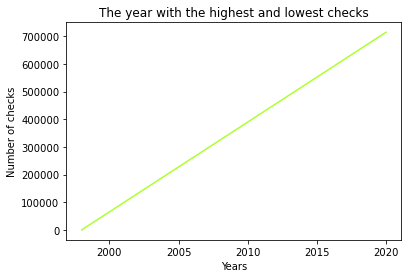

In [115]:
plt.title('The year with the highest and lowest checks')
plt.xlabel('Years')
plt.ylabel('Number of checks')
plt.plot(year, data,'greenyellow')
plt.show()

### Answers:
So far, **Illinois** state has the highest number of checks since the program initiated in 1998. It registered 714424 checks in July, 2020.

On the other hand, **South Carolina** state registered the lowest number of checks with only 6 checks in November,1998.

And as the figure shows, it has increased significantly since 1998 by about 11.9×10^6%.

## 4. Conclusion

In conclusion, both datasets share similar columns, such as the date and the states columns. The Analysis process showed that the gun registration per capita is equal to 0.39781331523550745% in 2010, while in 2016 it is equal to 0.677793404977627%. And that shows that the gun registration per capita has increased since 2010 by approximetly 70%.

Moreover, states such as Illinois, Kentucky, Texas, Florida, Indiana and California kept the record of being the top states with high gun registration in 2018, 2019 and 2020. Furthermore, the type of firearms that the citizens of the United States of America tend to purchase in 2020 are primarily handguns, then comes the long guns. Furthermore, since the FBI's National Instant Criminal Background Check System initiated in 1998, Illinois state registered the highest number of checkes in July, 2020 with 714424 checks. While South Carolina registered the lowest number of checkes in November, 1998, with only 6 checks.

There were quite few limitations and challenges in both datasets. For the Census dataset, there ware missing data that might contribute in the analysis accuracy, such as the five addressed colonies; District of Columbia, Guam, Mariana Islands, Puerto Rico and Virgin Islands. It would have been better if they were included in order to calculate the gun per capita appropriately and check the results. Moreover, Kentucky and Illinois are probably outliers among the the other states of U.S. The reason behind this assumption is that after the observations Kentucky and Illinois's records are noticeably higher compared to the other states in 2018, 2019 and 2020. From my perspective, it would be advisable and reasonable to verify the Kentucky and Illinois data again, especially Illinois since it has the strictest gun control in the U.S. Finally, at the time of this project the gun dataset was up to date, but not complete. I think it would be better to updata the dataset once the year is over and check if the results would change.

## 5. General Resources
- Data Wrangling with Python Tips and Tools to Make Your Life Easier by Jacqueline Kazil, Katharine Jarmul.
- Python for Data Analysis Data Wrangling with Pandas, NumPy, and IPython by Wes McKinney.
- https://matplotlib.org/3.3.2/index.html
- https://pandas.pydata.org/pandas-docs/stable/index.html